In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd

obj = json.load(open('results.json'))
obj

[{'round': 1,
  'winner': 'win',
  'roll': 92,
  'participants': ['server', 'pi', 'win']},
 {'round': 2, 'winner': 'server', 'roll': 54, 'participants': ['server']},
 {'round': 3, 'winner': 'pi', 'roll': 90, 'participants': ['pi', 'win']},
 {'round': 4,
  'winner': 'pi',
  'roll': 90,
  'participants': ['server', 'win', 'pi']},
 {'round': 5, 'winner': 'pi', 'roll': 75, 'participants': ['pi']},
 {'round': 6,
  'winner': 'server',
  'roll': 36,
  'participants': ['server', 'win']},
 {'round': 7, 'winner': 'pi', 'roll': 84, 'participants': ['pi']},
 {'round': 8,
  'winner': 'win',
  'roll': 59,
  'participants': ['pi', 'win', 'server']},
 {'round': 9,
  'winner': 'server',
  'roll': 84,
  'participants': ['win', 'server']},
 {'round': 10, 'winner': 'pi', 'roll': 52, 'participants': ['pi', 'server']},
 {'round': 11,
  'winner': 'pi',
  'roll': 41,
  'participants': ['pi', 'server', 'win']},
 {'round': 12, 'winner': 'pi', 'roll': 50, 'participants': ['pi']},
 {'round': 13, 'winner': 'pi', '

In [4]:
df = pd.read_json('results.json')
df

,round,winner,roll,participants
0,1,win,92,"[server, pi, win]"
1,2,server,54,[server]
2,3,pi,90,"[pi, win]"
3,4,pi,90,"[server, win, pi]"
4,5,pi,75,[pi]
...,...,...,...,...
295,296,server,76,[server]
296,297,server,77,"[pi, server]"
297,298,win,77,"[win, server]"
298,299,win,82,"[win, pi, server]"


In [29]:
participations = {"server": {0: 0, 1: 0, 2: 0}, "win": {0: 0, 1: 0, 2: 0}, "pi": {0: 0, 1: 0, 2: 0}}
for i in range(len(obj)):
    part = obj[i]['participants']
    a = {"server": 0, "win": 0, "pi": 0}
    for p in part:
        a[p] += 1
    for k, v in a.items():
        participations[k][v] += 1
participations
    

{'server': {0: 99, 1: 201, 2: 0},
 'win': {0: 119, 1: 161, 2: 20},
 'pi': {0: 100, 1: 197, 2: 3}}

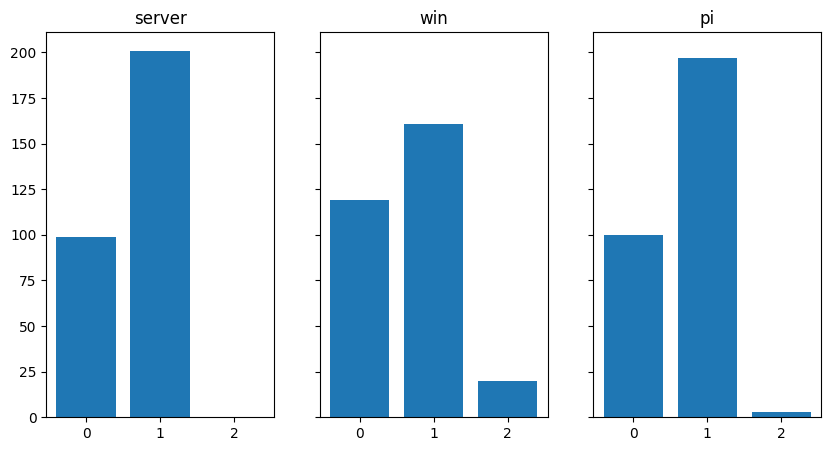

In [30]:
# plot participants into 3 subplots
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
ax[0].bar(participations['server'].keys(), participations['server'].values(), label='server')
ax[1].bar(participations['win'].keys(), participations['win'].values(), label='win')
ax[2].bar(participations['pi'].keys(), participations['pi'].values(), label='pi')

ax[0].set_title('server')
ax[1].set_title('win')
ax[2].set_title('pi')


plt.show()

Text(0.5, 1.0, 'Number of wins per player')

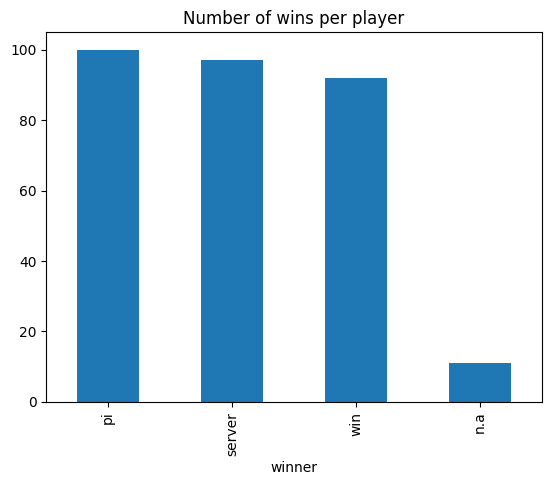

In [8]:
# barplots for the number of wins for player server, win, pi, Title "Number of wins" at the top
# replace 'Nobody participated' with 'No winner'
df["winner"].replace("'Nobody participated'", "n.a", inplace=True)
df["winner"].value_counts().plot(kind='bar')
plt.title("Number of wins per player")